<a href="https://colab.research.google.com/github/MonikaGost/Winc/blob/master/Module_4_Assignment_Global_Co2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PART 1 - CO2 of the bigger countries**
* Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

In [2]:
import pandas as pd
emissions = pd.read_csv("/content/co2_emissions.csv")

* Removing rows which do not contain countries

In [3]:
co2_emissions = emissions.loc[3:,]


* Changing values format to get co2 in Mt.



In [4]:
pd.options.display.float_format = '{0:,.0f}'.format

* Finding top 5 co2 producers by sorting out the list

In [5]:
co2_emissions.drop([67])

top_5 = co2_emissions.sort_values(by=["2021"], ascending=False).head(5)
# In this step I see there is EU in top 5 on the list.Because EU is not a country,  i removed it from the list one step earlier.

* Taking care to make a database the way, that adding new data in the future will also add it to the graph - so i remove 2021 year and leave 2017 as last one, like this i can do "open"slicing later on while making the graph.

In [6]:
top_5_countries = top_5.loc[:,"Country":"2017"]
top_5_countries

,Country,1990,2005,2017
42,China,"2,397","6,263","10,877"
202,United States,"5,086","5,972","5,107"
67,European Union,"4,409","4,250","3,548"
93,India,606,"1,211","2,455"
158,Russia,"2,379","1,734","1,765"


* Making a graph

In [7]:
import matplotlib.pyplot as plt


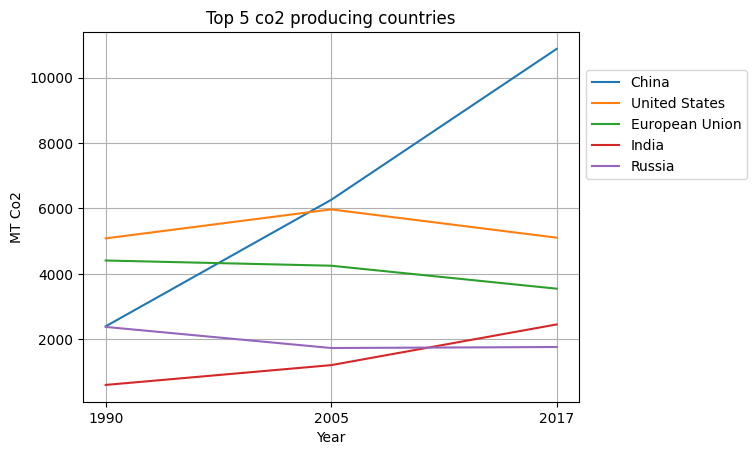

In [8]:
fig, ax = plt.subplots()
years = top_5_countries.columns[1:]

for index, row in top_5.iterrows():
  plt.plot(years, row[1:4], label = row[0])

plt.title("Top 5 co2 producing countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()

**PART 2 - worst and best changers**

A.Find the top three and bottom three countries with regards to lowering emissions and plot their results.

In [24]:
# Calculating relative CO2 emissions development over the years (I create apart data base and add new columns to it)
co2_development = co2_emissions.loc[:,"Country":"2017"]
co2_development["dev2005"] = (co2_development["2005"]/co2_development["1990"])*100
co2_development["dev2017"] = (co2_development["2017"]/co2_development["1990"])*100

In [ ]:
# Sorting the data base by relative change in emissions
co2_development.sort_values(by=["dev2017"])
# viewing this i see top and end 3 countries, so i canmake a new data base of those with slicing:


In [ ]:
# I create small table to make a graph from it.

co2_dev_graph = co2_development.loc[[10,128,199,62,34,81],"Country":"2017"]

# After seeing the data I decided to change the numbers format for better overview
pd.options.display.float_format = '{0:,.2f}'.format
co2_dev_graph

Making a graph

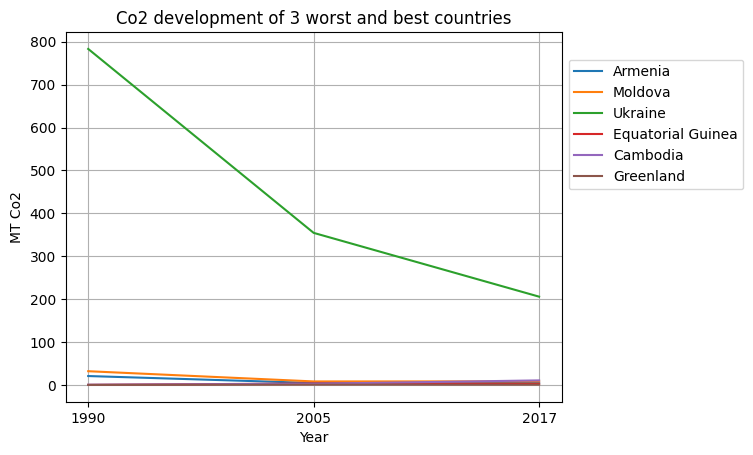

In [51]:
fig, ax = plt.subplots()
years = co2_dev_graph.columns[1:]

for index, row in co2_dev_graph.iterrows():
  plt.plot(years, row[1:4], label = row[0])

plt.title("Co2 development of 3 worst and best countries")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()


plt.show()



B.  Create the same chart for the top three and bottom three countries that had at least five Mt of CO2 emissions in 1990.

In [ ]:
# I get rid off the countries with less than 5 Mt Co2 in 1990 and 2005 and sort out data by relative change in 2017:
bigger_countries = co2_development.loc[co2_development["1990"] >= 5,:]

In [79]:
bigger_countries = bigger_countries.loc[bigger_countries["2005"] >= 5,:]

In [80]:
bigger_countries.sort_values(by=["dev2017"])

,Country,1990,2005,2017,dev2005,dev2017
128,Moldova,31.96,8.14,8.26,25.47,25.86
199,Ukraine,783.21,354.43,205.72,45.25,26.27
141,North Korea,131.37,79.57,37.77,60.57,28.75
110,Latvia,20.14,8.24,8.05,40.92,39.96
157,Romania,187.14,104.71,81.13,55.95,43.35
...,...,...,...,...,...,...
6,Angola,5.85,15.97,30.88,273.03,527.70
155,Qatar,16.29,43.44,97.79,266.62,600.25
17,Bangladesh,13.87,38.83,84.55,280.03,609.65
144,Oman,11.88,32.96,78.42,277.38,659.89


In [81]:
# I see the top and bottom 3 countries on and their row numbers in the output so i get them out to make a table for a graph.
co2_dev_bigger = bigger_countries.loc[[128,199,141,17,144,207],"Country":"2017"]
co2_dev_bigger

,Country,1990,2005,2017
128,Moldova,31.96,8.14,8.26
199,Ukraine,783.21,354.43,205.72
141,North Korea,131.37,79.57,37.77
17,Bangladesh,13.87,38.83,84.55
144,Oman,11.88,32.96,78.42
207,Vietnam,20.18,99.23,218.73


Making a graph

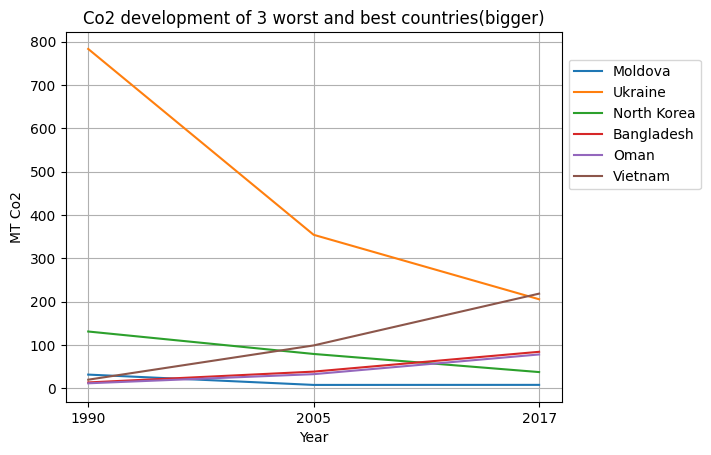

In [84]:
fig, ax = plt.subplots()
years = co2_dev_bigger.columns[1:]

for index, row in co2_dev_bigger.iterrows():
  plt.plot(years, row[1:4], label = row[0])

plt.title("Co2 development of 3 worst and best countries(bigger)")
plt.xlabel("Year")
plt.ylabel("MT Co2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.grid()

plt.show()